Name: Seyyid Hikmet Celik

ID:181201047

Course: BIL470

In [109]:
# for analyzing data
import pandas as pd
import numpy as np
import seaborn as sbn
from sklearn import metrics

# for plots
import matplotlib.pyplot as plt

# for training, our own implementation
from LR import LinearRegression

# Exploratory Data Analysis (EDA)

## Reading and Tuning Dataset

Beden kütle indeksi verilerini okuyup "Gender" sütununu kaldırıyorum.

In [110]:
bmi = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv', header=0)
bmi = bmi.drop(columns='Gender')

## Dataset Summary

In [111]:
display(bmi)

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


## Summary Each Features of Data

Özet olarak 500 satirlik, standart sapması yani farklılığı en çok Weight özniteliğinde olan bir veri setimiz var. 

In [112]:
ht = bmi['Height'].describe()
wt = bmi['Weight'].describe()
ix = bmi['Index'].describe()

print(ht)
print(wt)
print(ix)

count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64
count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64
count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


## Duplicated Data of Dataset

24 tane tekrarlayan verimiz var ama tekrarları çıkarmamız iyi olur mu bilmek için bir de veri setindeki tür sayılarının dengesine bakmalıyız.

In [113]:
display(bmi[bmi.duplicated()])
display(bmi.duplicated().sum())

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24

## Checking Balance of Dataset

Aşağıdaki grafiğe baktığımızda tekrarlayan verileri çıkarmamızda bir sıkıntı olmayacağını görüyoruz, çünkü zaten veriler dengeli bir biçimde dağılmamış.

/Users/shc/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


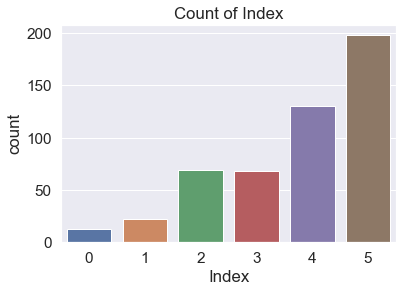

In [114]:
plt.title('Count of Index')
sbn.countplot(bmi['Index'])
plt.show()

In [115]:
bmi = bmi.drop_duplicates()

## Checking Null Values

Aşağıda görüleceği üzere veri setinden temizlememiz gereken null değerler yok.

In [116]:
print(bmi.isnull().sum(axis = 0))

Height    0
Weight    0
Index     0
dtype: int64


## Pair-plots of Features

Aşağıdaki grafiklere baktığımızda, farklı öznitelikler için verilerin birbirine göre uzayda nasıl dağıldığını görebiliyoruz ve bu da hangi özniteliği kullanmamız gerektiği konusunda bize kabaca fikir verebilir, örneğin tek özniteliğe göre lineer regresyon yapmamız gerekseydi, grafiklere bakıldığında "Weight" özniteliğini kullanmak daha iyi sonuç verebilirdi fakat burada zaten çok az (iki tane) öznitelik olduğu için öznitelik elemesi yapmamıza gerek yok.

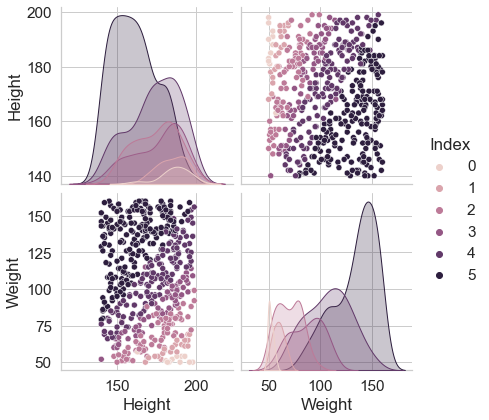

In [117]:
sbn.set_style('whitegrid')
sbn.pairplot(bmi, hue='Index', height=3)
plt.show()

## Correlation of Features

Yine burada özniteliklerin korelasyonlarına bakarak hangilerini kullanmanın daha iyi olabileceği çıkarımına varabiliriz. Bizim için önemli olan veri setini olabildiğince lineer doğruya yaklaştırmak olduğu için korelasyonu yani ilişkisi en fazla olanlara bakmamız gerekir. "Weight" özniteliğinin "Index" ile korelasyonu daha fazla (0.8) olduğu için yine yukarıda bahsettiğimiz durum geçerli, yani "Weight" özniteliği ile daha doğrusal bir model oluşturulabilir.

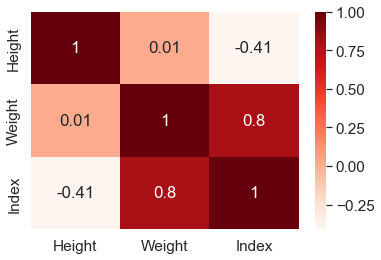

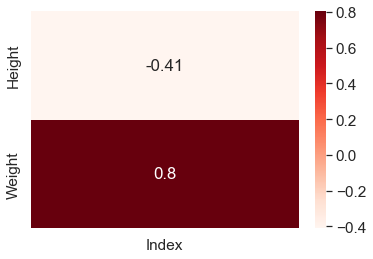

In [118]:
cm = bmi.corr()
ft = cm.drop(columns=['Height', 'Weight'])
ft = ft.drop(labels=['Index'])

sbn.set(font_scale=1.4)
sbn.heatmap(cm, annot=True, cmap=plt.cm.Reds)
plt.show()

sbn.set(font_scale=1.4)
sbn.heatmap(ft, annot=True, cmap=plt.cm.Reds)
plt.show()

# Training with the Linear Regression Model

Veri setini eğitmek üzere, bu dokümanın sonunda ya da "LR.py" dosyasında bulabileceğiniz daha önceden oluşturduğumuz Gradient Descent Lineer Regresyon modelini, 'learning_rate' 0.000005 ve 'epoch' 1000 olacak şekilde çağırıyoruz.

In [119]:
clf = LinearRegression(learning_rate=0.000005, epoch=1000)

## Split Dataset to Train and Test

Veri setini karıştırıyoruz (shuffle) ve %50 eğitim, %50 test verisi olacak şekilde ayrıştırıyoruz.

In [120]:
bmi = bmi.sample(frac=1).reset_index(drop=True)

portion = 0.5
n = int(portion * len(bmi))
train_bmi = bmi.iloc[0:n, :] 
test_bmi = bmi.iloc[n:len(bmi), :]

x_train = np.array(train_bmi["Height"])
y_train = np.array(train_bmi["Weight"])
z_train = np.array(train_bmi["Index"])

x_test = np.array(test_bmi["Height"])
y_test = np.array(test_bmi["Weight"])
z_test = np.array(test_bmi["Index"])

## Train the Classifier

Veri setini oluşturmuş olduğumuz Gradient Descent algoritmasını kullanan model sayesinde eğitiyoruz ve bu sırada her bir epoch için loss değerlerinin azalışını da ekrana bastırıp görebiliyoruz.

In [121]:
loss_list = clf.fit(x_train, y_train, z_train)

loss: 144990.75210084033  	(1/1000)
loss: 52658.463164727014  	(2/1000)
loss: 19516.622188028927  	(3/1000)
loss: 7614.36519985912  	(4/1000)
loss: 3333.7074571043763  	(5/1000)
loss: 1788.0785394798952  	(6/1000)
loss: 1224.0184155636791  	(7/1000)
loss: 1012.3271755698728  	(8/1000)
loss: 927.225390274198  	(9/1000)
loss: 887.6938228799802  	(10/1000)
loss: 864.657855171076  	(11/1000)
loss: 847.6822943964291  	(12/1000)
loss: 833.0204055880884  	(13/1000)
loss: 819.3255220482133  	(14/1000)
loss: 806.1122336423592  	(15/1000)
loss: 793.2042114429092  	(16/1000)
loss: 780.5360690180501  	(17/1000)
loss: 768.0822633863083  	(18/1000)
loss: 755.831581869583  	(19/1000)
loss: 743.7779866312239  	(20/1000)
loss: 731.9173288824215  	(21/1000)
loss: 720.2461693214046  	(22/1000)
loss: 708.7613543644338  	(23/1000)
loss: 697.4598635870836  	(24/1000)
loss: 686.3387544923755  	(25/1000)
loss: 675.3951422106877  	(26/1000)
loss: 664.6261917419966  	(27/1000)
loss: 654.0291147062483  	(28/1000

Aşağıda görülebileceği üzere train ve test için loss graph'leri çizdiriyoruz, train'de beklendiği gibi 0'a yaklaşıyor, test'te ise sabit kalıyor çünkü model önceden eğitildiği için loss çok değişmiyor.

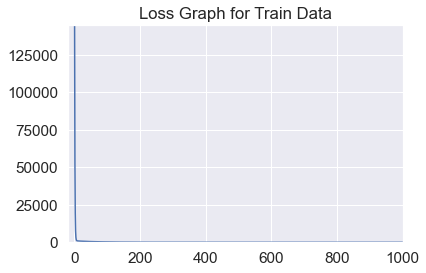

In [122]:
epochs = []
for x in range(1,1001):
    epochs.append(x)

plt.plot(epochs, loss_list)
plt.title('Loss Graph for Train Data')
plt.xlim(-20, 1000)
plt.ylim(-20, loss_list[0])
plt.show()

In [123]:
loss_list = clf.get_loss(x_test, y_test, z_test)

loss: 0.5978244192488105  	(1/1000)
loss: 0.5978244192488105  	(2/1000)
loss: 0.5978244192488105  	(3/1000)
loss: 0.5978244192488105  	(4/1000)
loss: 0.5978244192488105  	(5/1000)
loss: 0.5978244192488105  	(6/1000)
loss: 0.5978244192488105  	(7/1000)
loss: 0.5978244192488105  	(8/1000)
loss: 0.5978244192488105  	(9/1000)
loss: 0.5978244192488105  	(10/1000)
loss: 0.5978244192488105  	(11/1000)
loss: 0.5978244192488105  	(12/1000)
loss: 0.5978244192488105  	(13/1000)
loss: 0.5978244192488105  	(14/1000)
loss: 0.5978244192488105  	(15/1000)
loss: 0.5978244192488105  	(16/1000)
loss: 0.5978244192488105  	(17/1000)
loss: 0.5978244192488105  	(18/1000)
loss: 0.5978244192488105  	(19/1000)
loss: 0.5978244192488105  	(20/1000)
loss: 0.5978244192488105  	(21/1000)
loss: 0.5978244192488105  	(22/1000)
loss: 0.5978244192488105  	(23/1000)
loss: 0.5978244192488105  	(24/1000)
loss: 0.5978244192488105  	(25/1000)
loss: 0.5978244192488105  	(26/1000)
loss: 0.5978244192488105  	(27/1000)
loss: 0.59

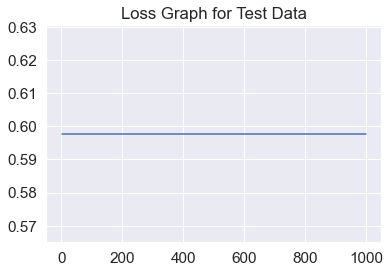

In [124]:
plt.plot(epochs, loss_list)
plt.title('Loss Graph for Test Data')
plt.show()

## Predicting Class of Test Values

Test verilerini tahmin ediyoruz ve beklenen değerlere benzer tahminler yaptığımızı görebiliyoruz ki bunları sonuçlar kısmında daha detaylı görebiliriz.

In [125]:
zhat = clf.predict(x_test, y_test)
print('Test Features Expected Classification')
print(z_test)
print('Prediction')
print(zhat)

print()

xyhat = clf.predict(x_train, y_train)
print('Train Features Expected Classification')
print(z_train)
print('Prediction')
print(xyhat)

Test Features Expected Classification
[4 4 4 2 5 5 4 3 3 3 2 5 3 5 3 2 4 2 5 2 4 3 5 5 5 4 5 5 5 5 5 3 5 2 5 5 4
 4 3 4 4 3 2 5 2 4 5 2 4 1 4 5 4 3 4 1 5 5 1 3 4 0 5 5 2 4 0 4 4 5 5 5 4 3
 5 5 0 4 4 4 5 4 5 3 4 5 5 0 3 2 4 1 5 5 2 5 4 5 4 5 5 5 5 5 5 2 5 5 5 5 5
 4 1 1 5 5 3 3 5 4 5 5 3 5 2 4 5 5 2 5 5 5 5 2 4 5 5 1 5 2 5 3 5 5 1 2 4 4
 4 5 4 4 5 2 2 5 4 5 5 4 3 5 5 4 4 5 3 0 3 4 5 4 4 3 2 2 5 0 3 4 2 4 5 3 4
 3 4 5 5 1 3 2 5 4 5 2 2 5 3 5 4 5 3 4 4 1 4 5 2 4 2 5 2 5 3 4 3 4 5 5 4 5
 4 4 4 2 5 5 5 3 4 4 4 5 5 5 5 2]
Prediction
[3.32595896 3.77867548 4.88059795 1.66679425 4.33433613 5.90702734
 4.58035845 3.33461236 3.48708938 3.41556541 1.71710281 5.88975079
 2.53528666 5.61466557 2.83552616 2.27670232 3.61912666 2.31522453
 4.11504968 2.02441411 3.17190035 3.31575422 5.12187549 4.55833712
 5.29243498 3.54524542 5.72313016 3.89576322 5.6657498  5.4881185
 5.10379302 3.89815074 5.17454132 2.6783346  4.88608816 3.7362144
 3.78810455 3.20335076 2.23582284 3.9224991  2.5313478  2.91412193


# RESULTS

## R2 Score

Test ve train değerleri için R2-Score'u beklendiği gibi 0.7'ye yakın bir değer olarak elde ettik.

In [126]:
print(f"R2 Score (Test): {metrics.r2_score(z_test, zhat)}")
print(f"R2 Score (Train): {metrics.r2_score(z_train, xyhat)}")

R2 Score (Test): 0.666060190287169
R2 Score (Train): 0.6342824929405984


## Accuracy Graph

Aşağıdaki grafiklerde uygulanan lineer regresyon modelinin oluşturduğu doğru ve verilerin nasıl toplandığı, doğruluğu görülebilir. Hem train hem test verileri için uygulanan modelin güzel fit ettiğini görebiliyoruz.

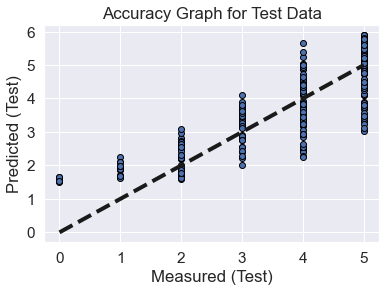

In [127]:
fig, ax = plt.subplots()
ax.scatter(z_test, zhat, edgecolors=(0, 0, 0))
ax.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'k--', lw=4)

ax.set_xlabel('Measured (Test)')
ax.set_ylabel('Predicted (Test)')
plt.title('Accuracy Graph for Test Data')
plt.show()

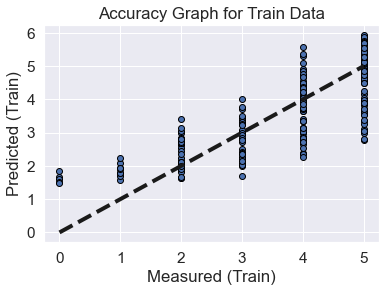

In [128]:
fig2, ax2 = plt.subplots()
ax2.scatter(z_train, xyhat, edgecolors=(0, 0, 0))
ax2.plot([z_train.min(), z_train.max()], [z_train.min(), z_train.max()], 'k--', lw=4)

ax2.set_xlabel('Measured (Train)')
ax2.set_ylabel('Predicted (Train)')
plt.title('Accuracy Graph for Train Data')
plt.show()

Tüm değerlendirmeler ve değişik ölçme yöntemlerine bağlı sonuçlar göz önüne alındığında uygulamış olduğumuz algoritmanın hem test hem train verileri için iyi tahmin yaptığını ve ayrıca test tahminlerinin, train tahminlerinden uzak olmadığını hatta yakın olduğunu görebiliyoruz ki bu da yine Gradient Descent Lineer Regresyon algoritmasının ne kadar iyi çalıştığını ve doğru uygulamış olduğumuzu bize gösteriyor.

# LinearRegression

Gradient Descent algoritmasına göre oluşturulan ve yukarıda veri setini eğitmek için kullanmış olduğumuz Lineer Regresyon modeli aşağıdaki kod parçasında görülebilir.

In [129]:
# LR.py

class LinearRegression:
    def __init__(self, learning_rate=0.000005, epoch=1000):
        self.learning_rate = learning_rate
        self.epoch = epoch
        
        self.m1 = 1
        self.m2 = 2
        self.b = 0

    def fit(self, x_train, y_train, z_train):
        loss_list = []
        n = len(z_train)
        for i in range(self.epoch):
            z_predicted = self.m1 * x_train + self.m2 * y_train + self.b
            error = z_predicted - z_train
            # mean square error
            loss = sum(error**2)/n

            # parcali turevler
            loss_m1 = 2 * sum(error * x_train)/n 
            loss_m2 = 2 * sum(error * y_train)/n
            loss_b = 2 * sum(error)/n

            # yeni denklem katsayilari
            self.m1 = self.m1 - self.learning_rate * loss_m1
            self.m2 = self.m2 - self.learning_rate * loss_m2
            self.b = self.b - self.learning_rate * loss_b
            print("loss: " + loss.__str__() + "  \t(" + (i+1).__str__() + "/" + self.epoch.__str__() + ")")
            loss_list.append(loss)
        
        return loss_list

    def predict(self, x_test, y_test):
        return self.m1 * x_test + self.m2 * y_test + self.b

    # test verilerinin lossunu elde etmek icin ekstra fonksiyon
    def get_loss(self, x, y, z):
        loss_list = []
        n = len(z)
        for i in range(self.epoch):
            z_predicted = self.m1 * x + self.m2 * y + self.b
            error = z_predicted - z
            loss = sum(error**2)/n
            
            print("loss: " + loss.__str__() + "  \t(" + (i+1).__str__() + "/" + self.epoch.__str__() + ")")
            loss_list.append(loss)
        
        return loss_list

# References

[1] https://www.anaconda.com

[2] https://jupyter.org

[3] https://seaborn.pydata.org/generated/seaborn.pairplot.html

[4] https://en.wikipedia.org/wiki/Gradient_descent

[5] https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21

[6] https://machinelearningmastery.com/regression-metrics-for-machine-learning

[7] https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc